In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold

In [2]:
faces = datasets.fetch_olivetti_faces()

In [3]:
y = faces.target
y.shape

(400,)

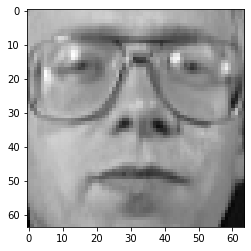

In [5]:
images = faces.images
plt.imshow(images[11], cmap = "gray")


In [7]:
X = faces.data
X.shape

(400, 4096)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

1.0

In [15]:
knn.score(X_test, y_test)

0.9125

In [17]:
knn.score(X_train, y_train)

1.0

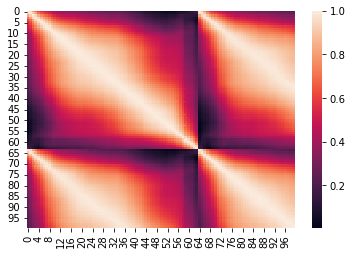

In [22]:
X = pd.DataFrame(X)
correlation = X.iloc[:, :100].corr()
sns.heatmap(correlation)

In [19]:
pca = PCA(whiten = True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)[:, :20]
X_test_pca = pca.transform(X_test)[:, :20]

In [20]:
knn_pca = KNeighborsClassifier(n_neighbors = 1)
knn_pca.fit(X_train_pca, y_train)
knn_pca.score(X_test_pca, y_test)

0.9

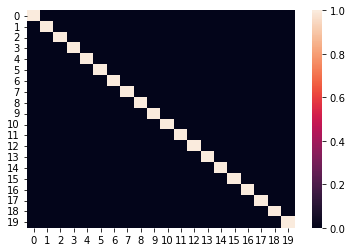

In [21]:
X_train_pca = pd.DataFrame(X_train_pca)
correlation_pca = X_train_pca.iloc[:, :100].corr()
sns.heatmap(correlation_pca)

# Tuning parameters

In [28]:
from sklearn.model_selection import cross_val_score, KFold

In [29]:
#cross_val_score(knn, X_train, y_train, scoring = "accuracy", cv = 5)
faces = datasets.fetch_olivetti_faces()
y = faces.target
X = faces.data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True)

# for Tuning K

In [31]:
nneighbors = np.arange(1, 11)
kf = KFold(n_splits = 5, shuffle = True).get_n_splits(X_train)
cv_scores = np.empty((len(nneighbors), 2))
counter = -1
for k in nneighbors:
    counter += 1
    knn = KNeighborsClassifier(n_neighbors = k)
    score = np.mean(cross_val_score(knn, X_train, y_train, scoring = "accuracy", cv = kf))
    cv_scores[counter, :] = np.array([k, score])

print(cv_scores)
cv_scores[np.argmax(cv_scores[:, 1]), :]
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


[[ 1.        0.94375 ]
 [ 2.        0.859375]
 [ 3.        0.85    ]
 [ 4.        0.81875 ]
 [ 5.        0.784375]
 [ 6.        0.74375 ]
 [ 7.        0.7125  ]
 [ 8.        0.703125]
 [ 9.        0.66875 ]
 [10.        0.65625 ]]


0.8875

# for pc_scores and k

In [32]:
nneighbors = np.arange(1, 11)
comp = np.arange(10, 110, 10)
cv_scores = np.empty((len(nneighbors) * len(comp), 3))
counter = -1
cv = 10
pca = PCA(whiten = True)
pca.fit(X_train)
for c in comp:
    X_train_pca = pca.transform(X_train)[:, :c]
    for k in nneighbors:
        counter += 1
        knnpca = KNeighborsClassifier(n_neighbors = k)
        score = np.mean(cross_val_score(knnpca, X_train_pca, y_train, scoring = "accuracy", cv = cv))
        cv_scores[counter, :] = np.array([k, c, score])
print(cv_scores)
cv_scores[np.argmax(cv_scores[:, -1]), :]
X_train_pca = pca.transform(X_train)[:, :20]
X_test_pca = pca.transform(X_test)[:, :20]
knnpca = KNeighborsClassifier(n_neighbors = 1)
knnpca.fit(X_train_pca, y_train)
knnpca.score(X_test_pca, y_test)





/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The 

/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The 

/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The 

[[  1.        10.         0.89375 ]
 [  2.        10.         0.825   ]
 [  3.        10.         0.834375]
 [  4.        10.         0.803125]
 [  5.        10.         0.7875  ]
 [  6.        10.         0.715625]
 [  7.        10.         0.66875 ]
 [  8.        10.         0.65    ]
 [  9.        10.         0.634375]
 [ 10.        10.         0.646875]
 [  1.        20.         0.946875]
 [  2.        20.         0.896875]
 [  3.        20.         0.9125  ]
 [  4.        20.         0.8875  ]
 [  5.        20.         0.88125 ]
 [  6.        20.         0.865625]
 [  7.        20.         0.85    ]
 [  8.        20.         0.85    ]
 [  9.        20.         0.821875]
 [ 10.        20.         0.821875]
 [  1.        30.         0.94375 ]
 [  2.        30.         0.903125]
 [  3.        30.         0.909375]
 [  4.        30.         0.871875]
 [  5.        30.         0.871875]
 [  6.        30.         0.853125]
 [  7.        30.         0.828125]
 [  8.        30.         0.

/Users/somayeghasemi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.9125